In [1]:
# Mount google drive

from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)
# Right click on the BANA6350>Data folder and copy the folder path by click "Copy Path". Then paste that inside the code below to link your folder where all the data will reside

import os

path = "/content/gdrive/MyDrive/BANA7350/Data"

os.chdir(path)

# the above code will change your current working directory to the path i.e., BANA6350/Data folder
# Let's try opening a file inside our Current working directory:

import pandas as pd
pd.read_csv('a10.csv').head()

Mounted at /content/gdrive/


,index,a10
0,1991 Jul,3.526591
1,1991 Aug,3.180891
2,1991 Sep,3.252221
3,1991 Oct,3.611003
4,1991 Nov,3.565869


In [2]:
import matplotlib.pyplot as plt

plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = [14.0, 6.0]
plt.rcParams['font.size']= 18
plt.style.available   # Check what styles are available for Chart formats by visiting : https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('fivethirtyeight')       # Assigning the FiveThirtyEight format, you can choose any of the names from the above link

In [3]:
!pip install fredapi

In [4]:
from fredapi import Fred #importing Fred from fredapi
fred = Fred(api_key="9e0f82a9fddc7a0463c03b379d992d96") #creating a variable called fred with my api key

In [5]:
import pandas as pd

df = pd.read_csv('UNRATE.csv', index_col=0, parse_dates=True) #reading the downloaded data
df

,UNRATE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
...,...
2024-02-01,3.9
2024-03-01,3.8
2024-04-01,3.9


In [6]:
df['UNRATE'].mean()

5.692919389978214

<Axes: xlabel='DATE', ylabel='Unemployment Rate'>

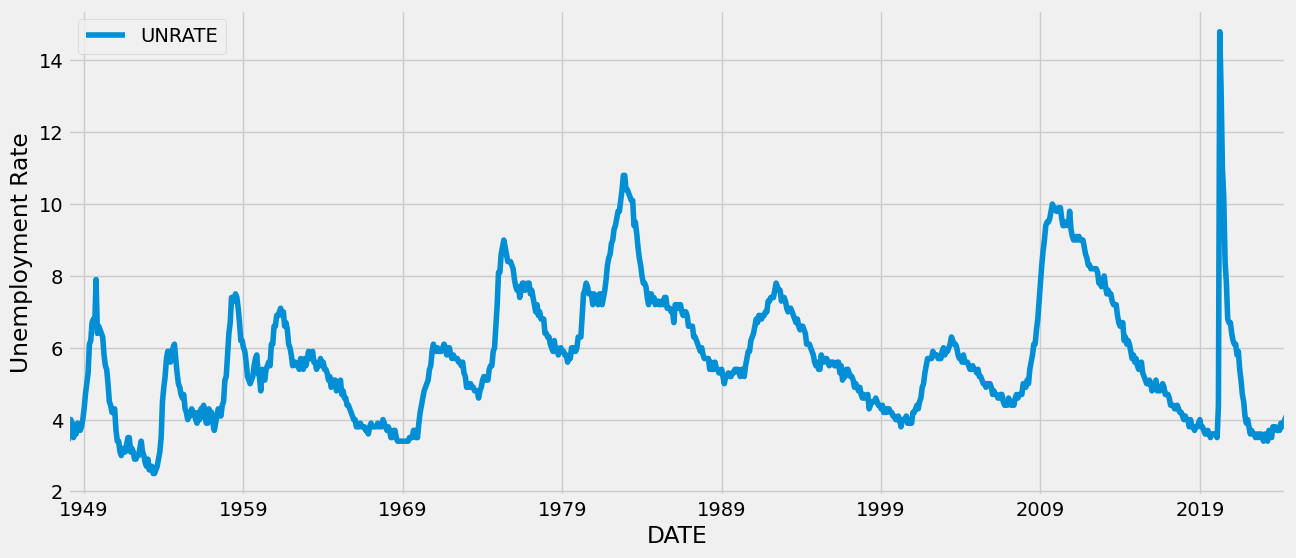

In [7]:
#Time Series Deccomposition
import statsmodels.api as sm
from statsmodels.tsa.seasonal import DecomposeResult

df.plot(ylabel = "Unemployment Rate")



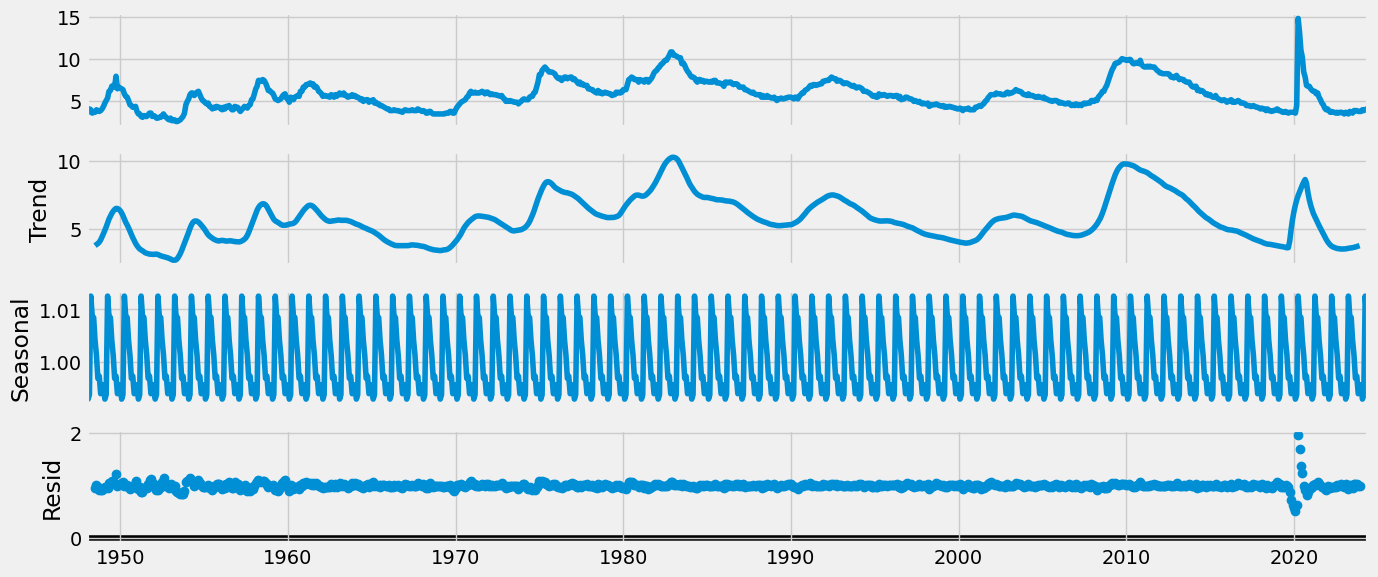

In [8]:
decomposition = sm.tsa.seasonal_decompose(df, model='multiplicative')
fig = decomposition.plot()



In [9]:
df['observed'] = decomposition.observed
df['residual'] = decomposition.resid
df['seasonal'] = decomposition.seasonal
df['trend'] = decomposition.trend


In [10]:
df['seas_adj.'] = df['observed'] - df['seasonal']

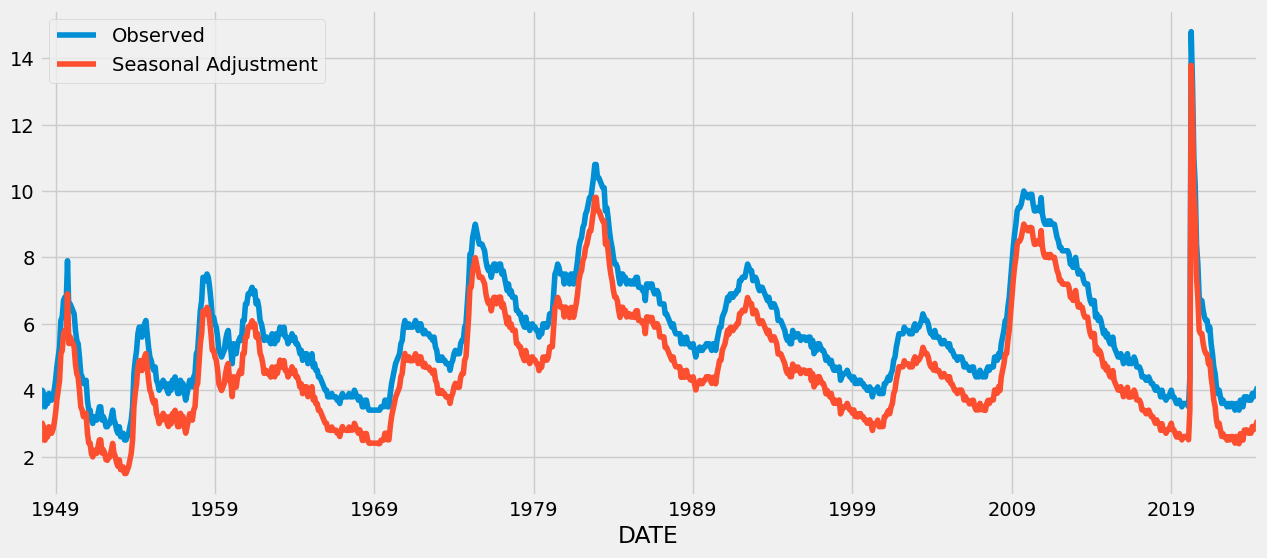

In [11]:

df['observed'].plot(label = "Observed")
df['seas_adj.'].plot(label = 'Seasonal Adjustment')
plt.legend()
plt.show()

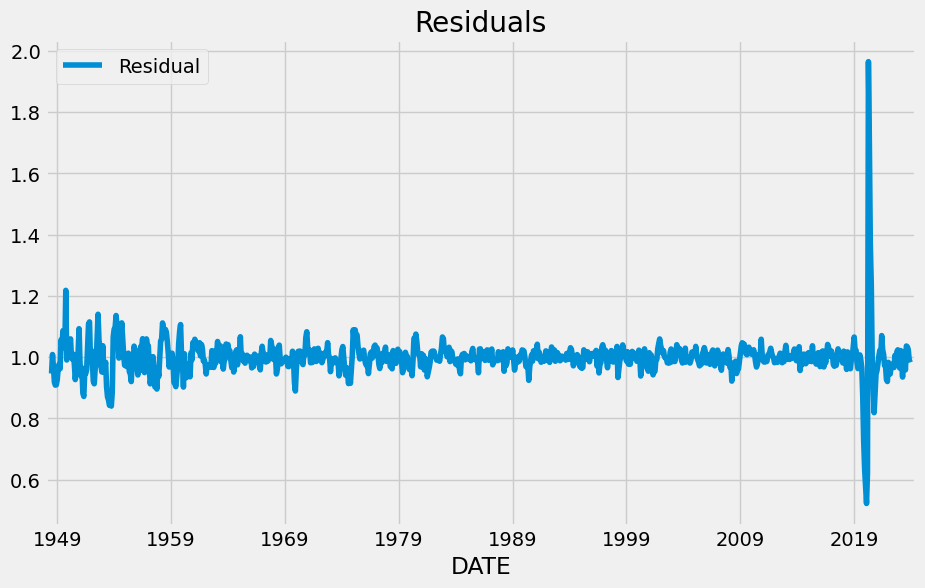

In [12]:
plt.figure(figsize=(10, 6))
df['residual'].plot(label = "Residual")

plt.title('Residuals')
plt.legend()
plt.show()


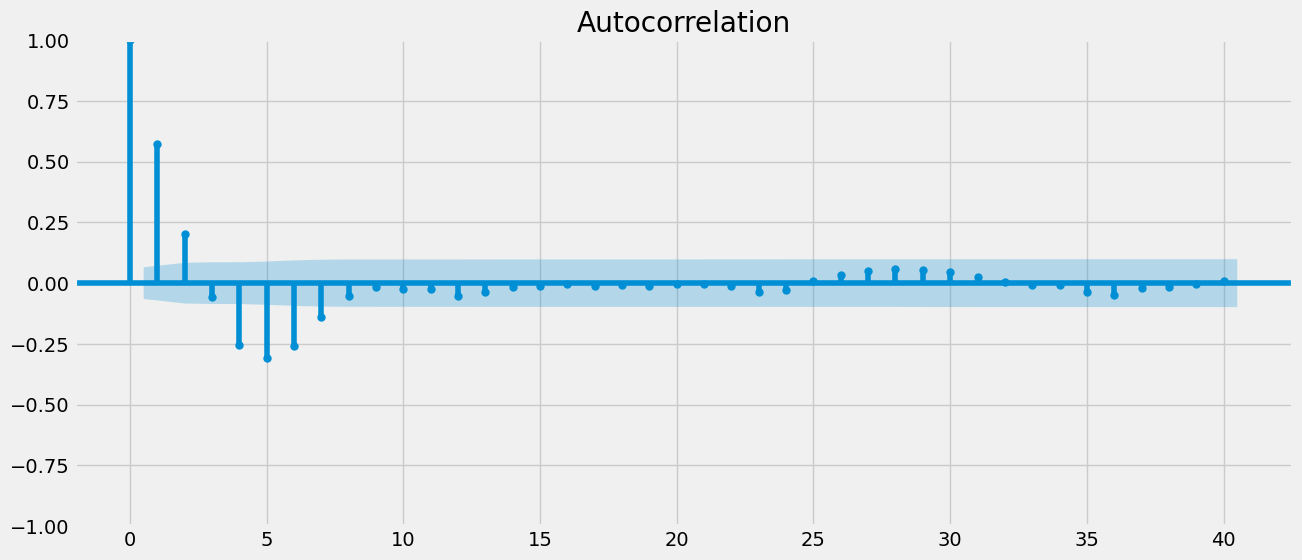

In [13]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['residual'].dropna(), lags=40)
plt.show()


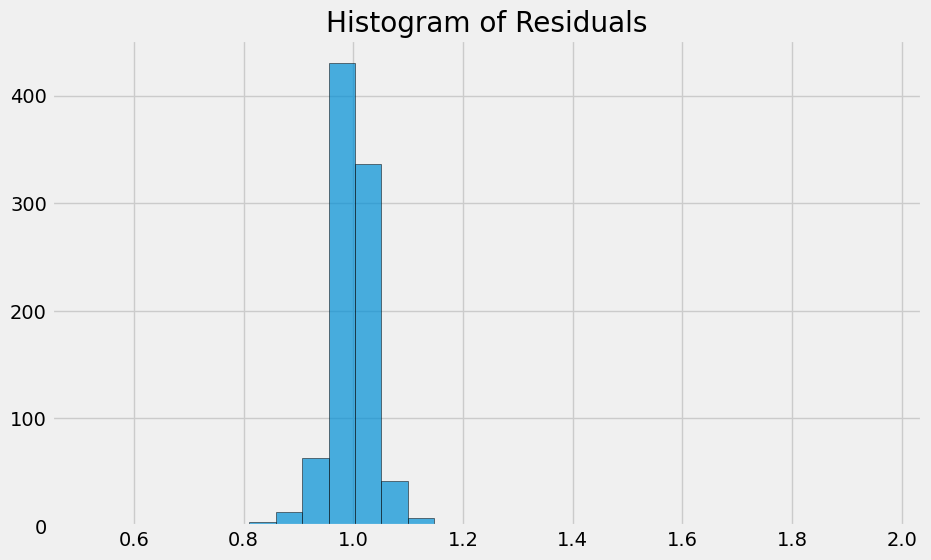

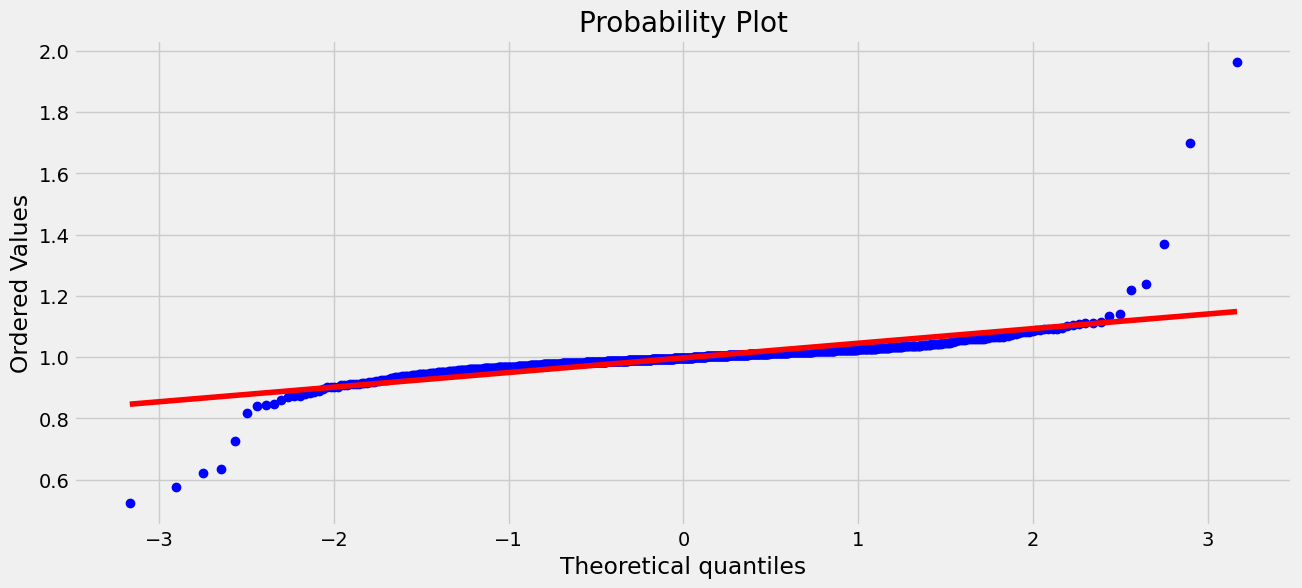

In [14]:
import scipy.stats as stats

plt.figure(figsize=(10, 6))
plt.hist(df['residual'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals')
plt.show()

stats.probplot(df['residual'].dropna(), dist="norm", plot=plt)
plt.show()


In [15]:
mean_residual = df['residual'].mean()
print(f'Mean of Residuals: {mean_residual}')


Mean of Residuals: 0.9974857745204223


<Axes: xlabel='DATE'>

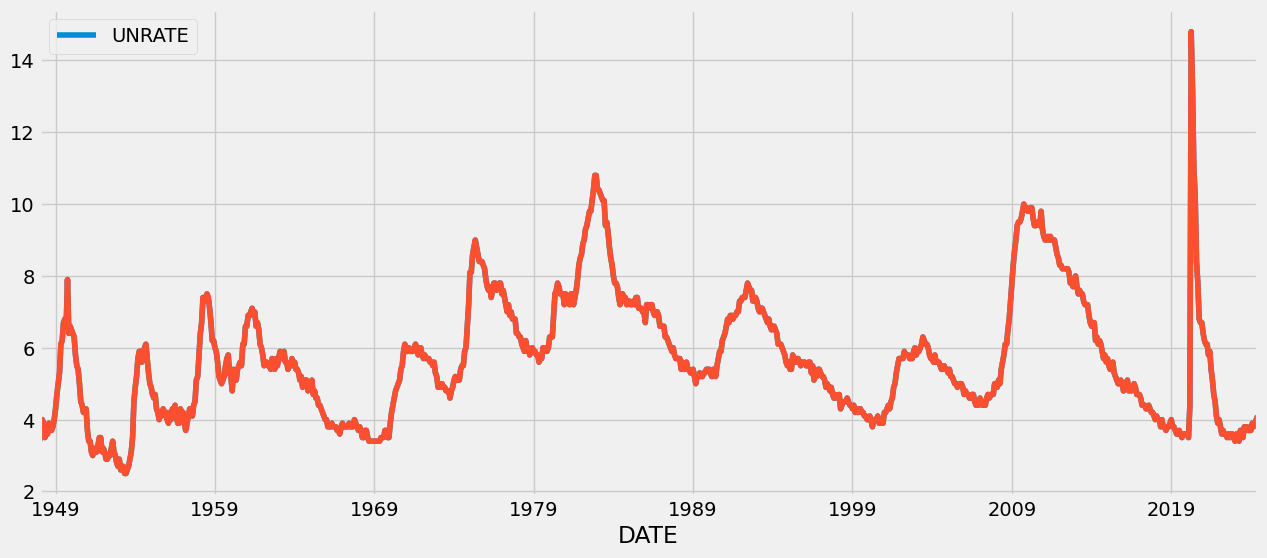

In [16]:
#SARIMA
df1 = pd.read_csv('UNRATE.csv', index_col=0, parse_dates=True) #reading the downloaded data
df1
df1.plot()

df1.fillna(0)

df1.index.freq='MS'

y=df1['UNRATE']
y
type(y)

y.plot()





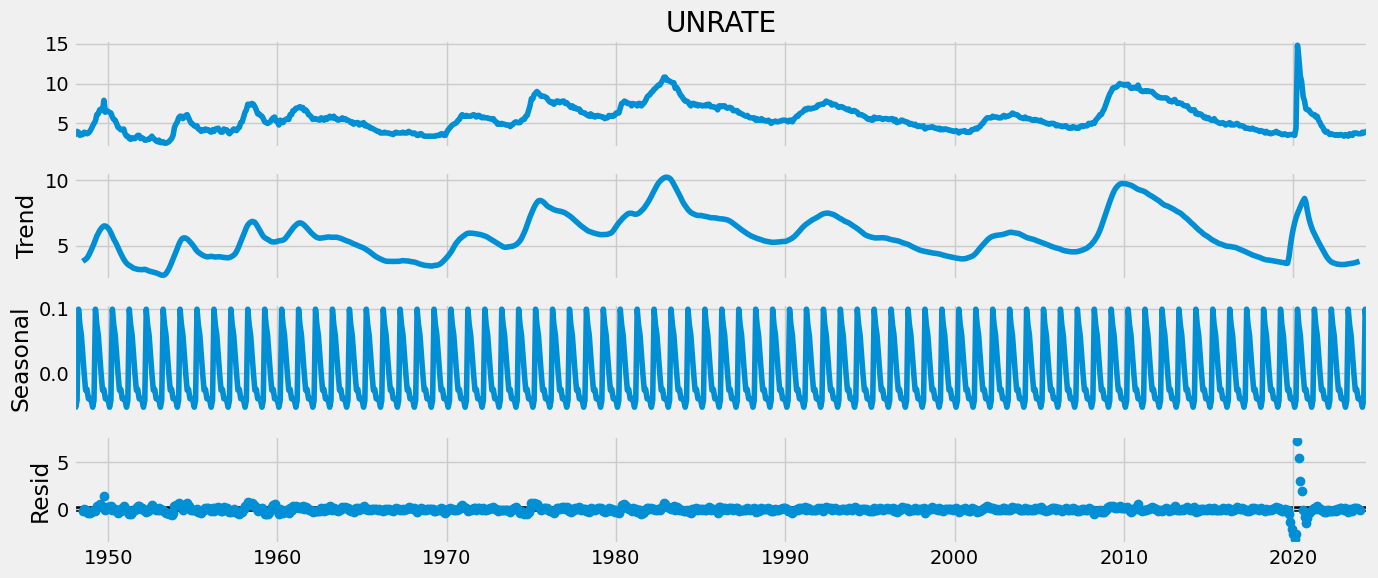

,UNRATE,observed,residual,seasonal,trend,seas_adj.
DATE,,,,,,
1948-01-01,3.4,3.4,NaN,0.995682,NaN,2.404318
1948-02-01,3.8,3.8,NaN,0.992951,NaN,2.807049
1948-03-01,4.0,4.0,NaN,0.993800,NaN,3.006200
1948-04-01,3.9,3.9,NaN,1.012526,NaN,2.887474
1948-05-01,3.5,3.5,NaN,1.008693,NaN,2.491307
...,...,...,...,...,...,...
2024-02-01,3.9,3.9,NaN,0.992951,NaN,2.907049
2024-03-01,3.8,3.8,NaN,0.993800,NaN,2.806200
2024-04-01,3.9,3.9,NaN,1.012526,NaN,2.887474


In [17]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import matplotlib.pyplot as plt

# do decomposition using Statsmodel

decomposition = seasonal_decompose(y)
decomposition.plot()
plt.show()

# Seasonal Plot : Done on the dataframe, not on y

df1['month'] = pd.to_datetime(df.index).month
df1['year'] = pd.to_datetime(df.index).year
df

In [18]:
train_size =  int(len(y) * 0.85)
train      =  y[1:train_size]
test       =  y[train_size:]

train
test

,UNRATE
DATE,
2013-01-01,8.0
2013-02-01,7.7
2013-03-01,7.5
2013-04-01,7.6
2013-05-01,7.5
2013-06-01,7.5
2013-07-01,7.3
2013-08-01,7.2
2013-09-01,7.2


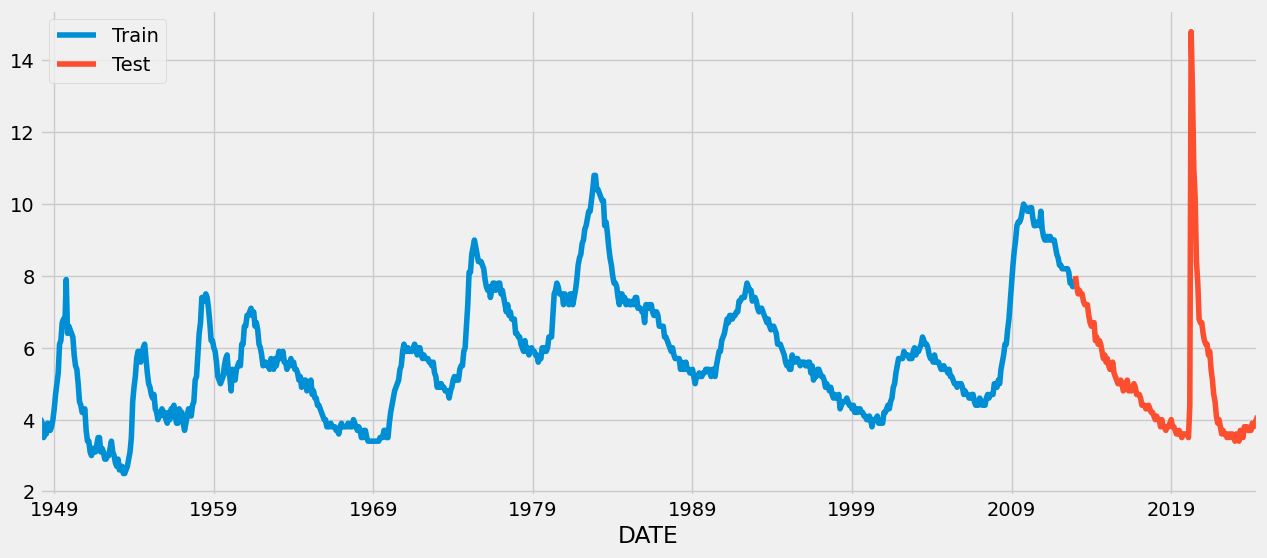

In [19]:
# plotting data
train.plot(label='Train')
test.plot(label='Test')
plt.legend()


In [20]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.1 MB/s eta 0:00:00


In [21]:
import pmdarima as pm
model = pm.auto_arima(y)

model

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

In [22]:
# now fitting an SARIMAS model from Statsmodel

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Running the SARIMAX using all default parameters

SARIMAX(y)
model.fit(y)
model.fit(y).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  918
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -495.356
Date:                Sun, 04 Aug 2024   AIC                           1002.712
Time:                        04:54:08   BIC                           1031.639
Sample:                    01-01-1948   HQIC                          1013.752
                         - 06-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    1.91e-05      0.001      0.018      0.985      -0.002       0.002
ar.L1          0.2632      0.092      2.848      0.004       0.082       0.444
ar.L2          0.6785      0.103      6.616      0.000       0.478       0.880
ma.L1         -0.2098      0.094     -2.243      0.025      -0.393      -0.027
ma.L2         -0.7576      0.099     -7.620      0.000      -0.952      -0.563
sigma2         0.1726      0.002     73.899      0.000       0.168       0.177
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):           6618622.41
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               6.30   Skew:                            16.53
Prob(H) (two-sided):                  0.00   Kurtosis:                       417.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
model = SARIMAX(train,order=(2,1,2),seasonal_order=(0,0,0,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 UNRATE   No. Observations:                  779
Model:               SARIMAX(2, 1, 2)   Log Likelihood                 155.010
Date:                Sun, 04 Aug 2024   AIC                           -300.020
Time:                        04:54:13   BIC                           -276.736
Sample:                    02-01-1948   HQIC                          -291.064
                         - 12-01-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9798      0.165      5.938      0.000       0.656       1.303
ar.L2         -0.1550      0.156     -0.996      0.319      -0.460       0.150
ma.L1         -0.9665      0.164     -5.884      0.000      -1.288      -0.645
ma.L2          0.3515      0.130      2.701      0.007       0.096       0.607
sigma2         0.0393      0.001     31.091      0.000       0.037       0.042
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1460.37
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.33   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

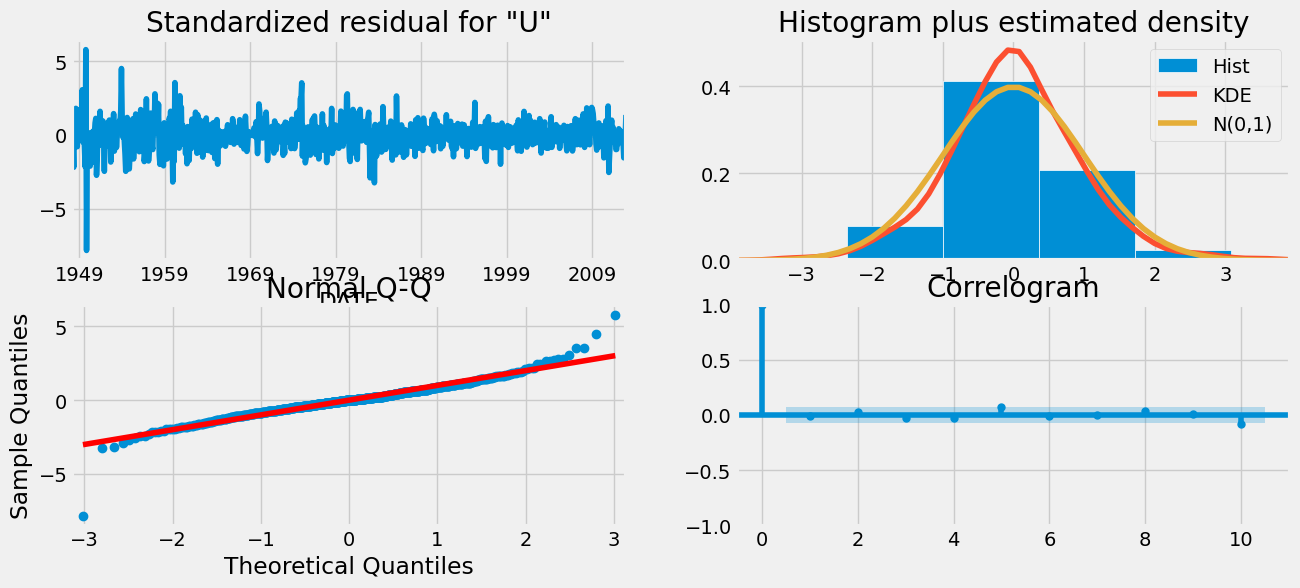

In [24]:
results.plot_diagnostics()
plt.show()

In [25]:
forecast_object = results.get_forecast(steps=len(test))      # note, here SARIMA has get_prediction() ,ETS uses get_prediction()
mean = forecast_object.predicted_mean
conf_int = forecast_object.conf_int()
dates = mean.index


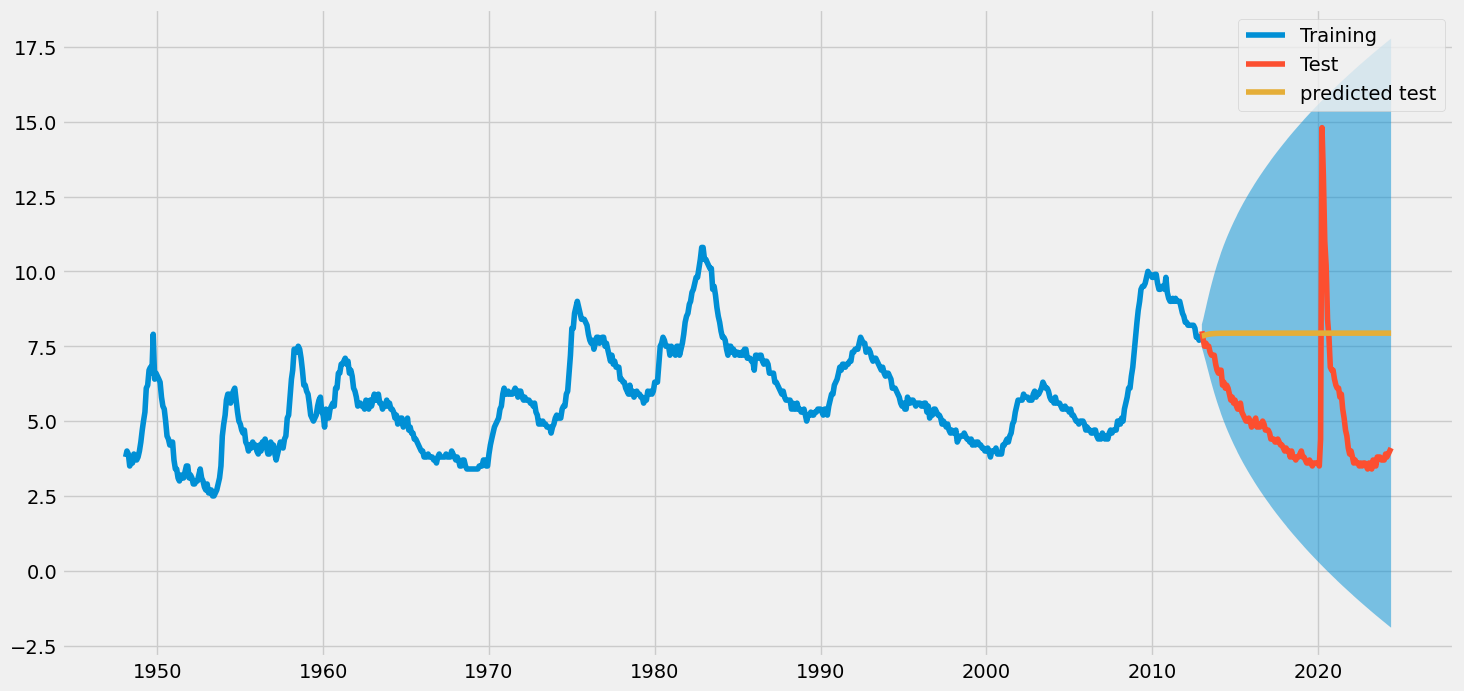

In [26]:
plt.figure(figsize=(16,8))
plt.plot(train.index, train, label='Training')
plt.plot(test.index, test, label='Test')
plt.plot(dates, mean, label='predicted test')
plt.fill_between(dates, conf_int.iloc[:,0], conf_int.iloc[:,1], alpha=0.5)
plt.legend()
plt.show()

In [27]:
!pip install sktime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.1/134.1 kB 9.6 MB/s eta 0:00:00


In [28]:
def accuracy(y_test,y_pred):
    from statsmodels.tools.eval_measures import rmse, rmspe, meanabs, mse
    from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
    from sklearn.metrics import r2_score
    R_sq= r2_score(y_test,y_pred)
    RMSE = rmse(y_test,y_pred)
    RMSPE = rmspe(y_test,y_pred)
    MAE = meanabs(y_test,y_pred)
    MSE =  mse(y_test,y_pred)
    MAPE = mean_absolute_percentage_error(y_test,y_pred)
    print('R-SQ : %f' % R_sq, ' RMSE : %f' % RMSE, ' RMSPE : %f' % RMSPE, ' MAE : %f' % MAE, ' MSE : %f' % MSE , ' MAPE : %f' % MAPE)

In [29]:
accuracy(test,mean)

R-SQ : -2.526762  RMSE : 3.393305  RMSPE : 8.327851  MAE : 3.130937  MSE : 11.514520  MAPE : 0.730116


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [30]:
forecast_future=results.get_forecast(steps=60)

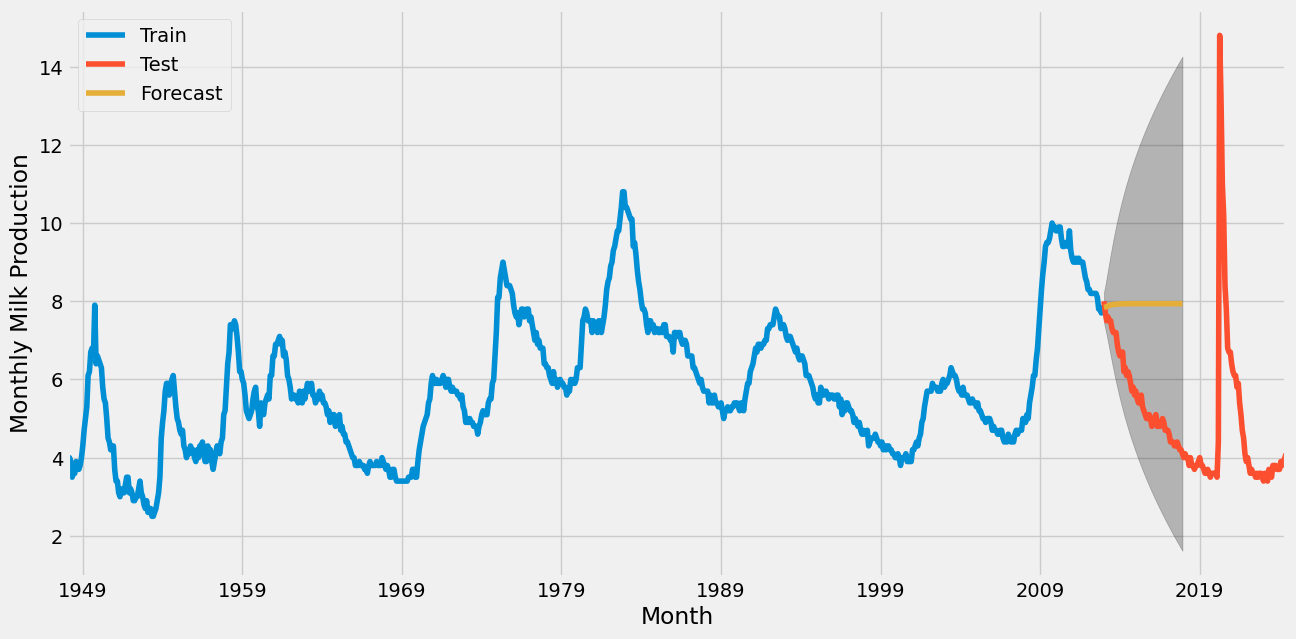

In [31]:
pred_f = results.get_forecast(steps=60)
pred_ci = pred_f.conf_int()
ax = train.plot(label='Train', figsize=(14, 7))
test.plot(ax=ax, label='Test')
pred_f.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Month')
ax.set_ylabel('Monthly Milk Production')
plt.legend()
plt.show()

In [32]:
forecast = forecast_future.summary_frame(alpha=0.05)
forecast.index.name ='Month'

full_data_with_forecast = df.join(forecast)
full_data_with_forecast.to_csv('forecast_output.csv')   # Store the Forecast Outputs

full_data_with_forecast

,UNRATE,observed,residual,seasonal,trend,seas_adj.,mean,mean_se,mean_ci_lower,mean_ci_upper
DATE,,,,,,,,,,
1948-01-01,3.4,3.4,NaN,0.995682,NaN,2.404318,NaN,NaN,NaN,NaN
1948-02-01,3.8,3.8,NaN,0.992951,NaN,2.807049,NaN,NaN,NaN,NaN
1948-03-01,4.0,4.0,NaN,0.993800,NaN,3.006200,NaN,NaN,NaN,NaN
1948-04-01,3.9,3.9,NaN,1.012526,NaN,2.887474,NaN,NaN,NaN,NaN
1948-05-01,3.5,3.5,NaN,1.008693,NaN,2.491307,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-02-01,3.9,3.9,NaN,0.992951,NaN,2.907049,NaN,NaN,NaN,NaN
2024-03-01,3.8,3.8,NaN,0.993800,NaN,2.806200,NaN,NaN,NaN,NaN
2024-04-01,3.9,3.9,NaN,1.012526,NaN,2.887474,NaN,NaN,NaN,NaN


In [33]:
#ETS Forecast
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
import seaborn as sns

model12 = ETSModel(df['UNRATE'], error='additive', initialization_method="estimated")
fit12  = model12.fit()
fcast12 = fit12.forecast(24)

fit12.summary()



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:                 UNRATE   No. Observations:                  918
Model:                       ETS(ANN)   Log Likelihood                -501.880
Date:                Sun, 04 Aug 2024   AIC                           1009.759
Time:                        04:54:53   BIC                           1024.226
Sample:                    01-01-1948   HQIC                          1015.281
                         - 06-01-2024   Scale                            0.175
Covariance Type:               approx                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9999      0.035     28.967      0.000       0.932       1.068
initial_level       3.3998      0.418      8.129      0.000       2.580       4.220
===================================================================================
Ljung-Box (Q):                        2.75   Jarque-Bera (JB):           6670404.47
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):               6.54   Skew:                            16.48
Prob(H) (two-sided):                  0.00   Kurtosis:                       419.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

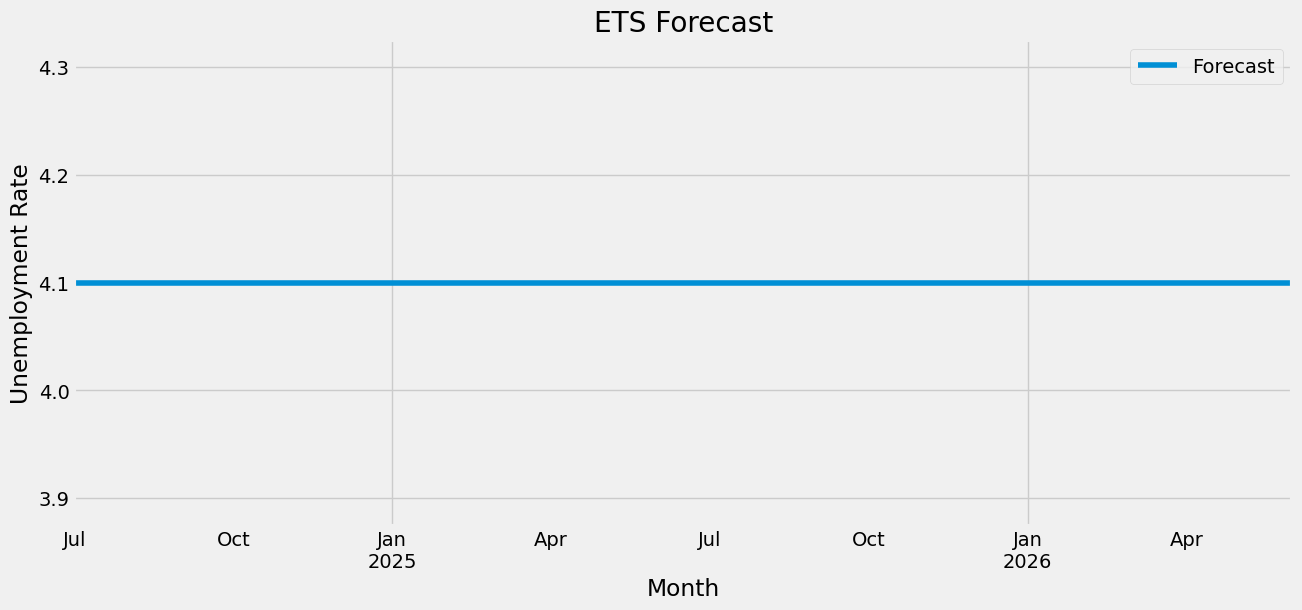

In [36]:
fcast12.plot(label ="Forecast", ylabel ="Unemployment Rate", xlabel = "Month")
plt.title("ETS Forecast")
plt.legend()
plt.show()

In [35]:
df['UNRATE'].tail(1)    # figure out the last time period of your data

,UNRATE
DATE,
2024-06-01,4.1


In [35]:
pred = fit12.get_prediction(start='2024-06-01', end='2026-06-01')

pred_intervals = pred.summary_frame(alpha=0.05)
pred_intervals

,mean,pi_lower,pi_upper
2024-06-01,3.99999,3.180688,4.819292
2024-07-01,4.09999,3.280688,4.919292
2024-08-01,4.09999,2.941380,5.258600
2024-09-01,4.09999,2.681012,5.518968
2024-10-01,4.09999,2.461509,5.738471
2024-11-01,4.09999,2.268122,5.931858
2024-12-01,4.09999,2.093285,6.106695
2025-01-01,4.09999,1.932506,6.267474
2025-02-01,4.09999,1.782857,6.417123
2025-03-01,4.09999,1.642302,6.557678


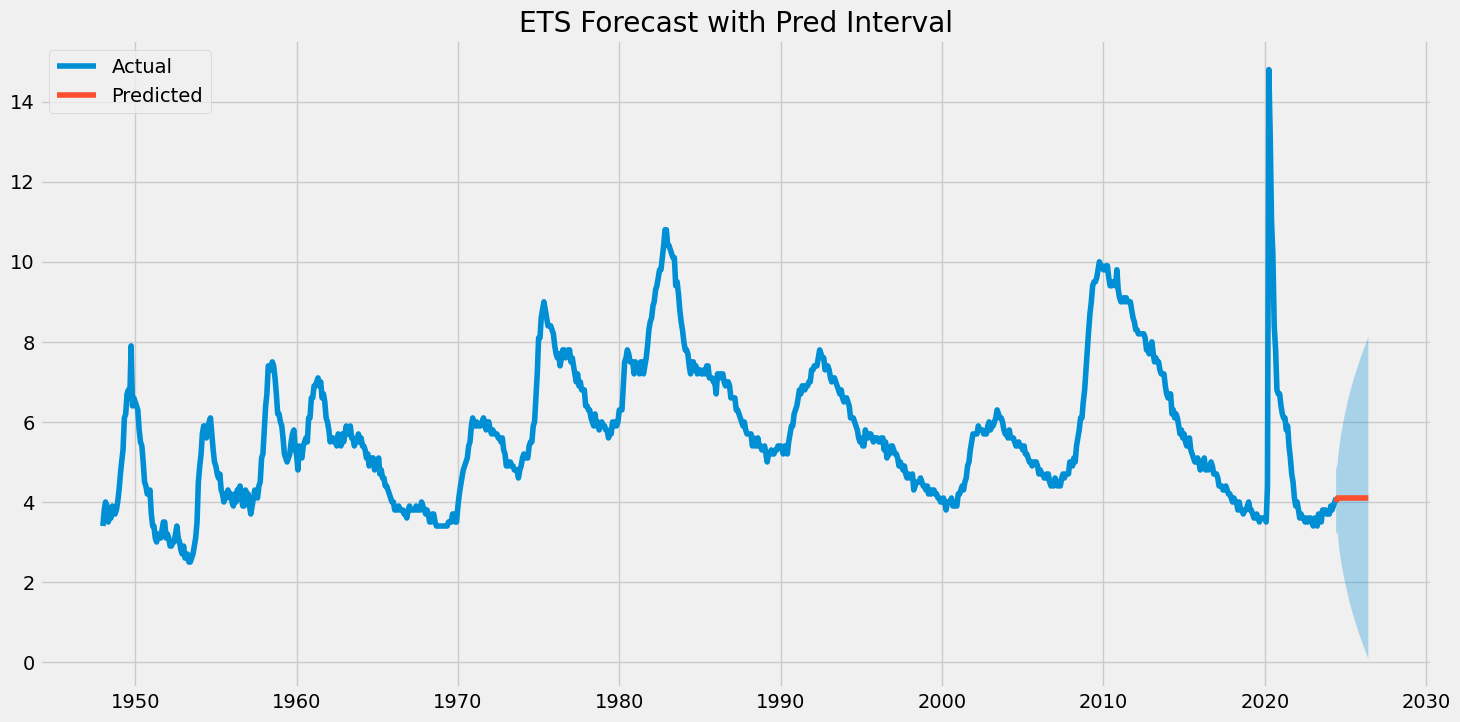

In [36]:
plt.figure(figsize=(16,8))
plt.plot(df.index, df['UNRATE'], label='Actual')
plt.plot(pred_intervals['mean'], label='Predicted')
plt.fill_between(pred_intervals.index,pred_intervals['pi_lower'], pred_intervals['pi_upper'], alpha=0.3)
plt.title('ETS Forecast with Pred Interval')
plt.legend()
plt.show()
